# ESA ClouDInSAR - InSAR Workflow Input Selection

## 1. Setup

Open the python notebook in CDSE JupyterLab and select the `esa-snap` kernel. Then install some additional needed libraries:

In [1]:
pip install shapely folium

Note: you may need to restart the kernel to use updated packages.


## 2. Import the s1_burst_lib python module

In [1]:
import s1_burst_lib
from IPython.display import JSON

Error while parsing JAI registry file "file:/home/mcallegari/esa_snap/snap/modules/ext/org.esa.snap.snap-gpf/org-jaitools/jt-vectorize.jar!/META-INF/registryFile.jai" :
Error in registry file at line number #4
A descriptor is already registered against the name "Vectorize" under registry mode "rendered"
Error while parsing JAI registry file "file:/home/mcallegari/esa_snap/snap/modules/ext/org.esa.snap.snap-core/org-geotools/gt-coverage.jar!/META-INF/registryFile.jai" :
Error in registry file at line number #31
A descriptor is already registered against the name "org.geotools.ColorReduction" under registry mode "rendered"
Error in registry file at line number #32
A descriptor is already registered against the name "org.geotools.ColorInversion" under registry mode "rendered"
Error while parsing JAI registry file "file:/home/mcallegari/esa_snap/snap/modules/ext/org.esa.snap.snap-core/org-jaitools/jt-zonalstats.jar!/META-INF/registryFile.jai" :
Error in registry file at line number #4
A de

## 3. Input definition

Set the temporal range of interest, polarization and area of interest as WKT

In [2]:
start_date = "2024-01-01"
end_date = "2024-12-31"

aoi = "POLYGON ((11.28 46.47, 11.28 46.52, 11.44 46.52, 11.44 46.47, 11.28 46.47))" # e.g. 'POLYGON ((11.28 46.47, 11.28 46.52, 11.44 46.52, 11.44 46.47, 11.28 46.47))'

pol = "VV"

## 4. Select burst ID and subswath ID

Retrieve the Sentinel-1 bursts

In [3]:
s1_bursts = s1_burst_lib.retrieve_bursts(start_date, end_date, pol, aoi)

In [4]:
JSON(s1_bursts)

<IPython.core.display.JSON object>

Show the Sentinel-1 bursts on a map

In [5]:
m = s1_burst_lib.show_bursts(s1_bursts, aoi)
m

Show acquisition calendar

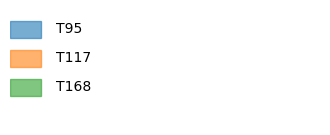

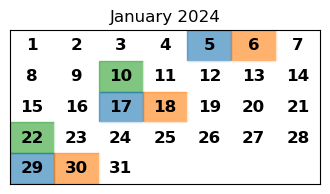

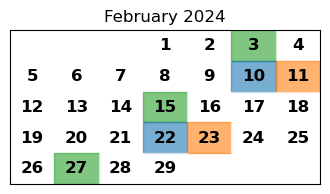

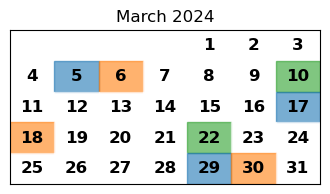

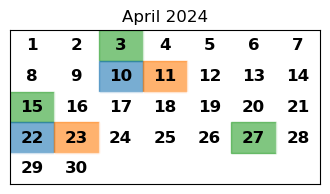

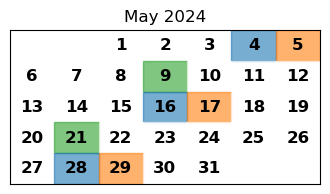

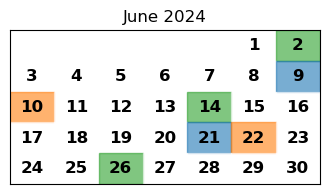

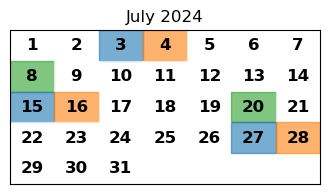

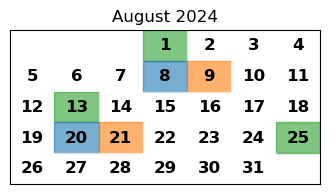

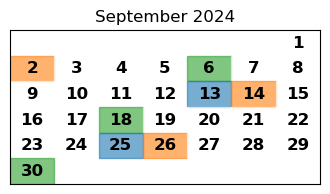

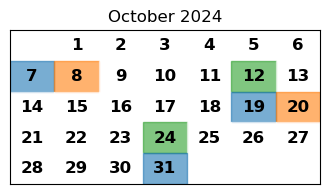

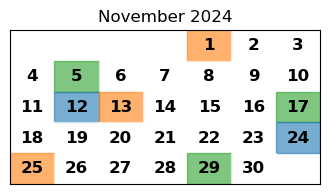

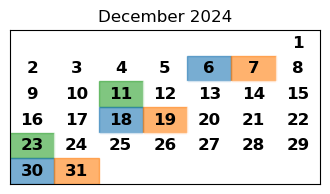

In [6]:
s1_burst_lib.show_acquisition_calendar(s1_bursts)

Select bursts

In [8]:
sub_swath_identifier = "iw2" # e.g. "iw2"
burst_id = "249433" # e.g. "249434"

## 3. Define InSAR pair list

Insert your [CDSE S3 credentials](https://eodata-s3keysmanager.dataspace.copernicus.eu/panel/s3-credentials)

In [9]:
# CDSE_ACCESS_KEY = ""
# CDSE_SECRET_KEY = ""

with open("../../CDSE_SECRET", "r") as file:
    lines = file.readlines()
CDSE_ACCESS_KEY = lines[0].strip().split(": ")[1]
CDSE_SECRET_KEY = lines[1].strip().split(": ")[1]

Download all the metadata of the selected data

In [10]:
s1_fileList = s1_burst_lib.download_s1metadata(s1_bursts, sub_swath_identifier, burst_id, CDSE_ACCESS_KEY, CDSE_SECRET_KEY)
s1_fileList

['S1A_IW_SLC__1SDV_20240306T170721_20240306T170748_052864_0665F0_9D32.SAFE',
 'S1A_IW_SLC__1SDV_20240223T170721_20240223T170748_052689_065FFC_3817.SAFE',
 'S1A_IW_SLC__1SDV_20240318T170721_20240318T170748_053039_066C27_017D.SAFE',
 'S1A_IW_SLC__1SDV_20240106T170722_20240106T170749_051989_064848_8293.SAFE',
 'S1A_IW_SLC__1SDV_20240118T170721_20240118T170748_052164_064E38_D3B2.SAFE',
 'S1A_IW_SLC__1SDV_20240211T170721_20240211T170748_052514_065A09_E4A5.SAFE',
 'S1A_IW_SLC__1SDV_20240130T170721_20240130T170748_052339_065425_776A.SAFE',
 'S1A_IW_SLC__1SDV_20240330T170722_20240330T170749_053214_0672CD_0A27.SAFE',
 'S1A_IW_SLC__1SDV_20240423T170722_20240423T170749_053564_068090_844F.SAFE',
 'S1A_IW_SLC__1SDV_20240505T170722_20240505T170749_053739_068777_4560.SAFE',
 'S1A_IW_SLC__1SDV_20240517T170722_20240517T170749_053914_068D9B_80EB.SAFE',
 'S1A_IW_SLC__1SDV_20240529T170722_20240529T170749_054089_0693B0_613D.SAFE',
 'S1A_IW_SLC__1SDV_20240610T170721_20240610T170748_054264_0699BB_8D56.SAFE',

### 3.1 InSAR pair list for SBAS configuration

117981 [main] INFO hdf.hdflib.HDFLibrary - HDF4 library: 
117982 [main] INFO hdf.hdflib.HDFLibrary -  successfully loaded.
117986 [main] INFO hdf.hdf5lib.H5 - HDF5 library: 
117986 [main] INFO hdf.hdf5lib.H5 -  successfully loaded.
INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
INFO: eu.esa.sar.commons.io.ImageIOFil

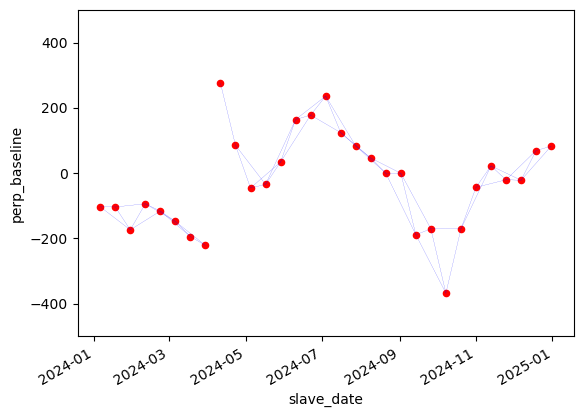

[['2024-03-06', '2024-03-18'],
 ['2024-03-06', '2024-03-30'],
 ['2024-02-23', '2024-03-06'],
 ['2024-02-23', '2024-03-18'],
 ['2024-03-18', '2024-03-30'],
 ['2024-01-06', '2024-01-18'],
 ['2024-01-06', '2024-01-30'],
 ['2024-01-18', '2024-02-11'],
 ['2024-01-18', '2024-01-30'],
 ['2024-02-11', '2024-03-06'],
 ['2024-02-11', '2024-02-23'],
 ['2024-01-30', '2024-02-23'],
 ['2024-01-30', '2024-02-11'],
 ['2024-04-23', '2024-05-05'],
 ['2024-04-23', '2024-05-17'],
 ['2024-05-05', '2024-05-17'],
 ['2024-05-05', '2024-05-29'],
 ['2024-05-17', '2024-05-29'],
 ['2024-05-17', '2024-06-10'],
 ['2024-05-29', '2024-06-10'],
 ['2024-05-29', '2024-06-22'],
 ['2024-06-10', '2024-06-22'],
 ['2024-06-10', '2024-07-04'],
 ['2024-04-11', '2024-04-23'],
 ['2024-06-22', '2024-07-04'],
 ['2024-06-22', '2024-07-16'],
 ['2024-07-04', '2024-07-16'],
 ['2024-07-04', '2024-07-28'],
 ['2024-08-09', '2024-09-02'],
 ['2024-08-09', '2024-08-21'],
 ['2024-09-02', '2024-09-26'],
 ['2024-09-02', '2024-09-14'],
 ['2024-

In [11]:
s1_burst_lib.sbas_pairs(s1_fileList, max_temporal_baseline=24, max_perp_baseline=200)

### 3.2 InSAR pair list for PS configuration

INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
/home/mcallegari/anaconda3/envs/cloudinsar/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


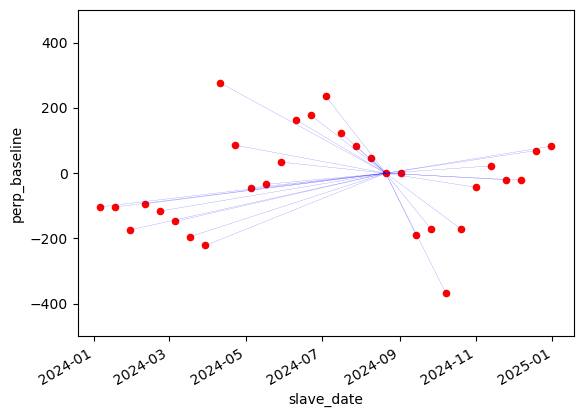

[['2024-08-21', '2024-03-06'],
 ['2024-08-21', '2024-02-23'],
 ['2024-08-21', '2024-03-18'],
 ['2024-08-21', '2024-01-06'],
 ['2024-08-21', '2024-01-18'],
 ['2024-08-21', '2024-02-11'],
 ['2024-08-21', '2024-01-30'],
 ['2024-08-21', '2024-03-30'],
 ['2024-08-21', '2024-04-23'],
 ['2024-08-21', '2024-05-05'],
 ['2024-08-21', '2024-05-17'],
 ['2024-08-21', '2024-05-29'],
 ['2024-08-21', '2024-06-10'],
 ['2024-08-21', '2024-04-11'],
 ['2024-08-21', '2024-06-22'],
 ['2024-08-21', '2024-07-04'],
 ['2024-08-21', '2024-08-09'],
 ['2024-08-21', '2024-09-02'],
 ['2024-08-21', '2024-09-26'],
 ['2024-08-21', '2024-07-16'],
 ['2024-08-21', '2024-09-14'],
 ['2024-08-21', '2024-07-28'],
 ['2024-08-21', '2024-12-31'],
 ['2024-08-21', '2024-10-08'],
 ['2024-08-21', '2024-11-13'],
 ['2024-08-21', '2024-12-07'],
 ['2024-08-21', '2024-11-01'],
 ['2024-08-21', '2024-10-20'],
 ['2024-08-21', '2024-11-25'],
 ['2024-08-21', '2024-12-19']]

In [12]:
s1_burst_lib.ps_pairs(s1_fileList)